In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\user\Desktop\datasets\Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
print(df.keys())

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [6]:
df.ndim

2

In [7]:
df.shape

(2200, 8)

In [8]:
# Features and Target

X = df.drop('label', axis=1)
y = df['label']

In [9]:
## Train Crop Recommendation Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

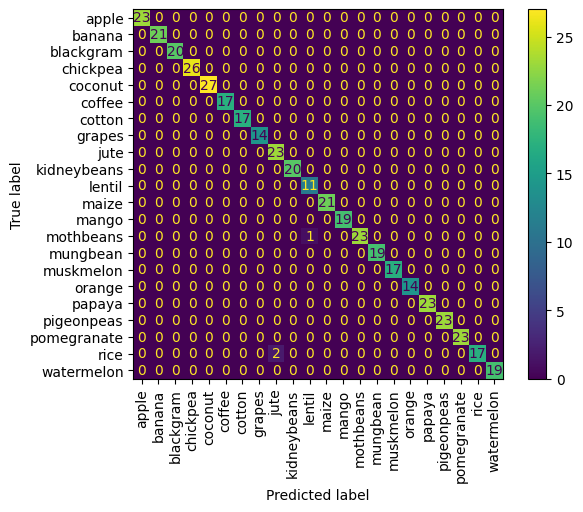

In [10]:
# Confusion Matrix: To visualize which crops are getting confused

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, xticks_rotation=90)


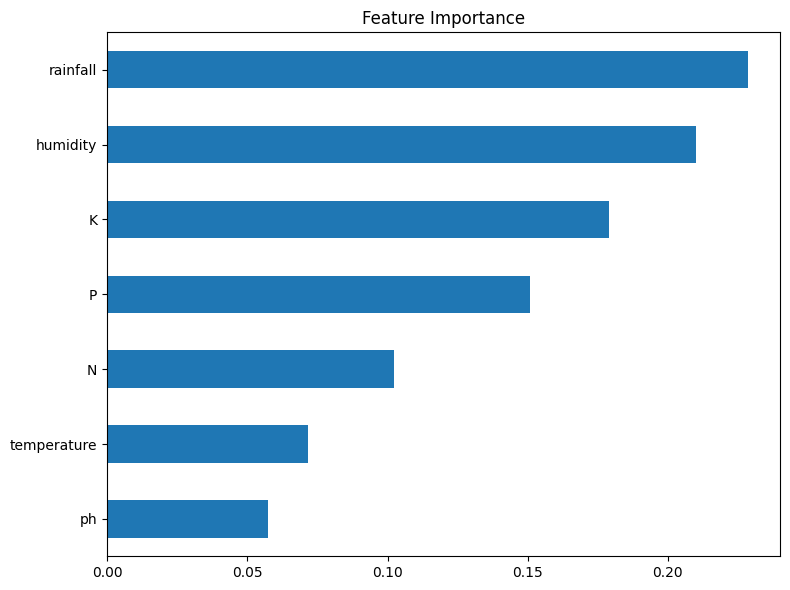

In [11]:
# Feature Importance

import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [12]:
# Cross-validation for more robust evaluation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [0.99545455 0.99318182 0.99772727 0.99772727 0.98636364]
Mean CV accuracy: 0.9940909090909091


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster column to the original DataFrame
df['Cluster'] = clusters

In [14]:
# Quick Cluster Counts

print(df.groupby('Cluster').size())

Cluster
0    1009
1     517
2     474
3     200
dtype: int64


In [15]:
cluster_summary = df.groupby('Cluster')[X.columns].mean()
print(cluster_summary)

                 N           P           K  temperature   humidity        ph  \
Cluster                                                                        
0        25.683845   48.603568   28.796829    25.444792  60.736315  6.603375   
1        99.822050   42.106383   38.994197    26.052003  80.836765  6.428816   
2        61.799578   42.010549   35.257384    26.508448  77.560136  6.436271   
3        21.990000  133.375000  200.000000    23.240259  87.104305  5.977800   

           rainfall  
Cluster              
0         81.843761  
1         70.960433  
2        190.140258  
3         91.133304  


In [16]:
overall_mean = df[X.columns].mean()
overall_mean

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

In [17]:
overall_mean = df[X.columns].mean()
cluster_mean = df.groupby('Cluster')[X.columns].mean()
deviation = cluster_mean.subtract(overall_mean)

deviation.style.background_gradient(cmap='coolwarm', axis=1)

,N,P,K,temperature,humidity,ph,rainfall
Cluster,,,,,,,
0,-24.867973,-4.759159,-19.352262,-0.171452,-10.745465,0.133895,-21.619894
1,49.270232,-11.256344,-9.154894,0.435759,9.354986,-0.040664,-32.503222
2,11.247760,-11.352179,-12.891707,0.892204,6.078357,-0.033209,86.676602
3,-28.561818,80.012273,151.850909,-2.375985,15.622526,-0.491680,-12.330351


In [18]:
# which crops dominate each cluster?

df.groupby('Cluster')['label'].value_counts()

Cluster  label      
0        blackgram      100
         chickpea       100
         kidneybeans    100
         lentil         100
         mango          100
         mothbeans      100
         mungbean       100
         orange         100
         pomegranate    100
         pigeonpeas      47
         papaya          29
         maize           24
         coconut          9
1        banana         100
         cotton         100
         muskmelon      100
         watermelon     100
         maize           76
         coffee          22
         papaya          19
2        jute           100
         rice           100
         coconut         91
         coffee          78
         pigeonpeas      53
         papaya          52
3        apple          100
         grapes         100
Name: count, dtype: int64

In [19]:
df.groupby('Cluster')['label'].value_counts().unstack().fillna(0).style.background_gradient(cmap='YlGn')

label,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,maize,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
Cluster,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,100.000000,100.000000,9.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,24.000000,100.000000,100.000000,100.000000,0.000000,100.000000,29.000000,47.000000,100.000000,0.000000,0.000000
1,0.000000,100.000000,0.000000,0.000000,0.000000,22.000000,100.000000,0.000000,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,0.000000,100.000000,0.000000,19.000000,0.000000,0.000000,0.000000,100.000000
2,0.000000,0.000000,0.000000,0.000000,91.000000,78.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,53.000000,0.000000,100.000000,0.000000
3,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


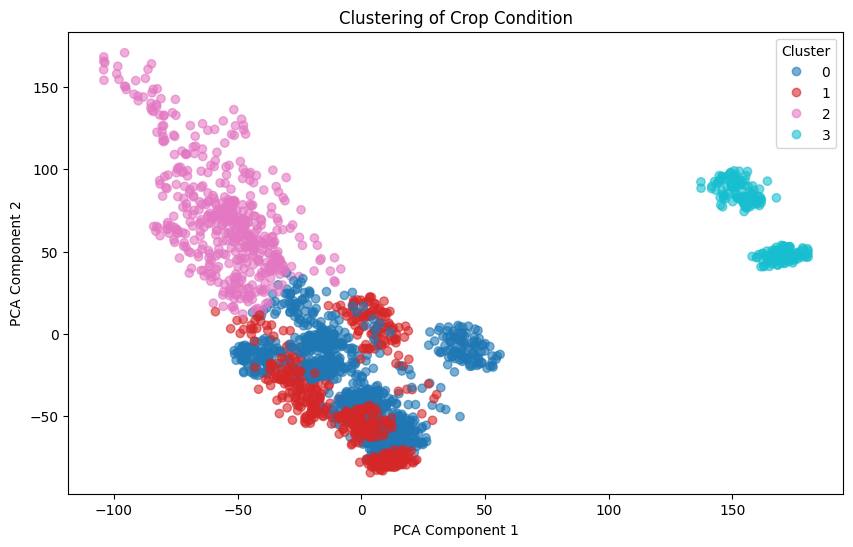

In [20]:
## Visualize Clusters with PCA (2D)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
components = pca.fit_transform(X)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

plt.figure(figsize =(10,6))
scatter = plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='tab10', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Crop Condition')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()